In [36]:
import pandas as pd
import datetime as dt
import pandas_datareader.data as web
start=dt.datetime(2015,1,1)                 #setting starting date
end=dt.datetime(2019,10,1)                  #end date

In [37]:
df=web.DataReader('JPM','yahoo',start,end)       #getting stock data from yahoo finance
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,62.959999,62.070000,62.180000,62.490002,12600000.0,54.812431
2015-01-05,62.279999,60.230000,62.060001,60.549999,20100600.0,53.110783
2015-01-06,60.750000,58.349998,60.639999,58.980000,29074100.0,51.733677
2015-01-07,59.889999,58.669998,59.889999,59.070000,23843200.0,51.812622
2015-01-08,60.900002,59.970001,59.970001,60.389999,16971100.0,52.970440


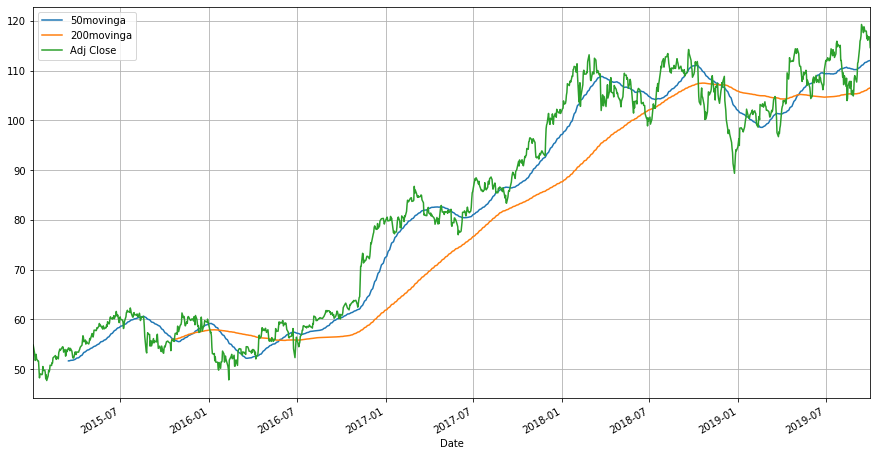

In [38]:
df['50movinga']=df['Adj Close'].rolling(50).mean()                           #calculating the 50 and 200 days moving average
df['200movinga']=df['Adj Close'].rolling(200).mean()
                                                                              #visualizing the stock price + averages
df[['50movinga','200movinga','Adj Close']].plot(figsize=(15,8),legend=True,grid=True)

In [39]:
stocks=pd.read_csv('stocklist.csv')          #opening a list of stock names
stocks.head()

,Column
0,JPM
1,MSFT
2,AAPL
3,AMZN
4,FB


In [40]:
corr=pd.DataFrame()              #creating a dataframe containing all the stocks data
                                 #in order to calculate and visualize the correlation between every stock price
for name in stocks['Column']:
    df=web.DataReader(name,'yahoo',start,end)
    if corr.empty:
        corr=df[['Adj Close']].rename(columns={'Adj Close':name})
    else:
        corr[f'{name}']=df['Adj Close']
        
corr.head()

,JPM,MSFT,AAPL,AMZN,FB,GOOG,GOOGL,JNJ,GS,V,BAC,INTC,PG,CSCO,DIS,HD,VZ,CVX,MA,XOM
Date,,,,,,,,,,,,,,,,,,,,
2015-01-02,54.812431,42.122040,100.755898,308.519989,78.449997,523.373108,529.549988,91.743134,181.354660,63.624630,16.546610,31.799398,77.737968,23.754028,87.899757,92.971001,37.812996,92.657646,82.951149,77.444969
2015-01-05,53.110783,41.734680,97.917427,302.190002,77.190002,512.463013,519.460022,91.102386,175.692245,62.220215,16.065928,31.440823,77.368362,23.280836,86.615250,91.020462,37.498959,88.954002,80.617889,75.325943
2015-01-06,51.733677,41.122128,97.926666,295.290009,76.150002,500.585632,506.640015,90.654724,172.138107,61.819290,15.585244,30.854856,77.015945,23.272228,86.155815,90.741798,37.877415,88.912827,80.443626,74.925484
2015-01-07,51.812622,41.644604,99.299805,298.420013,76.150002,499.727997,505.149994,92.656021,174.703430,62.647533,15.659194,31.502043,77.419930,23.487318,87.037170,93.851921,37.632992,88.838737,81.694969,75.684662
2015-01-08,52.970440,42.869705,103.115128,300.459991,78.180000,501.303680,506.910004,93.384560,177.492661,63.487797,15.982731,32.088005,78.305275,23.667990,87.937256,95.928322,38.439587,90.871651,82.965668,76.944412


In [14]:
mat=corr.corr()                                               #calculating the correlation
output1=corr.to_csv(r'C:\Users\Edo\Desktop\Python\Corr.csv', index = None, header=True)  
mat

,JPM,MSFT,AAPL,AMZN,FB,GOOG,GOOGL,JNJ,GS,V,BAC,INTC,PG,CSCO,DIS,HD,VZ,CVX,MA,XOM
JPM,1.000000,0.925170,0.936700,0.941307,0.908194,0.949638,0.945103,0.898634,0.728987,0.916254,0.985748,0.919658,0.658366,0.904997,0.650081,0.950727,0.756150,0.920289,0.900649,0.272709
MSFT,0.925170,1.000000,0.923542,0.970819,0.848780,0.929544,0.922382,0.856909,0.454031,0.996216,0.873478,0.916471,0.814451,0.973721,0.777864,0.967600,0.887583,0.877060,0.990718,0.218635
AAPL,0.936700,0.923542,1.000000,0.924228,0.827416,0.894589,0.888240,0.823757,0.633307,0.925046,0.917690,0.883358,0.667651,0.902769,0.710394,0.929316,0.739894,0.864598,0.921770,0.229186
AMZN,0.941307,0.970819,0.924228,1.000000,0.871578,0.958193,0.953776,0.867500,0.493319,0.968104,0.898268,0.936668,0.682708,0.957761,0.678336,0.964848,0.846038,0.876324,0.956037,0.272082
FB,0.908194,0.848780,0.827416,0.871578,1.000000,0.940674,0.940964,0.890351,0.638203,0.845681,0.883009,0.839928,0.639528,0.800632,0.526246,0.912298,0.666775,0.859262,0.812786,0.327289
GOOG,0.949638,0.929544,0.894589,0.958193,0.940674,1.000000,0.999461,0.912243,0.577292,0.922614,0.918646,0.913646,0.670217,0.888996,0.593111,0.964577,0.784890,0.873469,0.894659,0.291861
GOOGL,0.945103,0.922382,0.888240,0.953776,0.940964,0.999461,1.000000,0.910024,0.577058,0.915378,0.913980,0.905716,0.661474,0.879982,0.585282,0.959263,0.777127,0.863962,0.886064,0.288667
JNJ,0.898634,0.856909,0.823757,0.867500,0.890351,0.912243,0.910024,1.000000,0.552682,0.844892,0.857816,0.819858,0.720631,0.834282,0.528207,0.880557,0.795883,0.881516,0.804122,0.443202
GS,0.728987,0.454031,0.633307,0.493319,0.638203,0.577292,0.577058,0.552682,1.000000,0.438273,0.799850,0.544146,0.212877,0.440298,0.311222,0.551508,0.199429,0.638177,0.426553,0.207413
V,0.916254,0.996216,0.925046,0.968104,0.845681,0.922614,0.915378,0.844892,0.438273,1.000000,0.864547,0.910633,0.810760,0.973375,0.784542,0.967255,0.879755,0.865465,0.995352,0.200945


[Text(0, 0, 'JPM'),
 Text(0, 0, 'MSFT'),
 Text(0, 0, 'AAPL'),
 Text(0, 0, 'AMZN'),
 Text(0, 0, 'FB'),
 Text(0, 0, 'GOOG'),
 Text(0, 0, 'GOOGL'),
 Text(0, 0, 'JNJ'),
 Text(0, 0, 'GS'),
 Text(0, 0, 'V'),
 Text(0, 0, 'BAC'),
 Text(0, 0, 'INTC'),
 Text(0, 0, 'PG'),
 Text(0, 0, 'CSCO'),
 Text(0, 0, 'DIS'),
 Text(0, 0, 'HD'),
 Text(0, 0, 'VZ'),
 Text(0, 0, 'CVX'),
 Text(0, 0, 'MA'),
 Text(0, 0, 'XOM')]

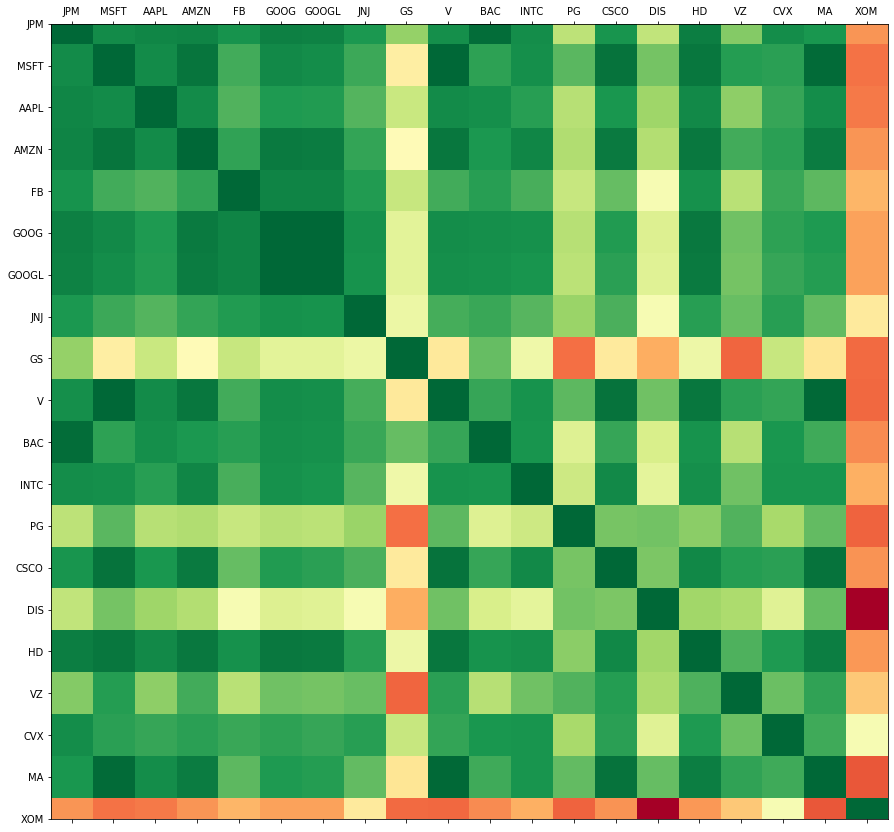

In [20]:
import numpy as np                          #getting more insights by visualizing the correlation matrix  
import matplotlib.pyplot as plt
label=[c for c in mat.columns]
fig=plt.figure(figsize=(15,15))
ax=fig.add_subplot(111)

ax.matshow(mat,cmap=plt.cm.RdYlGn)    #visualizing the correlation matrix, dark green means correlation=1.00, orange/red =  -0.3 <corr< +0.3

ax.set_xticks(np.arange(len(stocks)))
ax.set_yticks(np.arange(len(stocks)))
ax.set_xticklabels(label)
ax.set_yticklabels(label) 

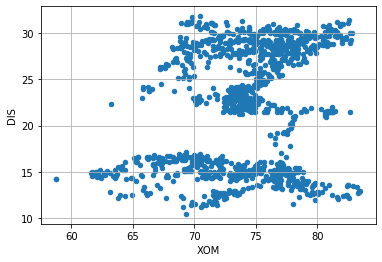

In [41]:
                                  #now we will pick two stocks with a low correlation coefficient and plot them to see the correlation#
dis=web.DataReader('DIS','yahoo',start,end)                    
xom=web.DataReader('XOM','yahoo',start,end).rename(columns={'Adj Close':'XOM'})

xom['DIS']=bac['Adj Close']

xom.plot.scatter('XOM','DIS',grid=True)                     #we can't really see a strong linear correlation

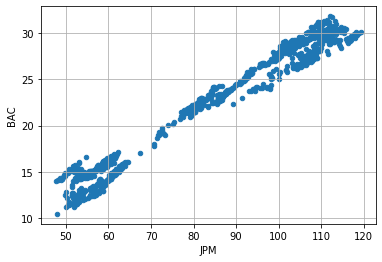

In [30]:
   #let's instead see the same graph but between two stocks with a high correlation (JPM and BAC, corr=0.985)

bac=web.DataReader('BAC','yahoo',start,end)                    
jpm=web.DataReader('JPM','yahoo',start,end).rename(columns={'Adj Close':'JPM'})

jpm['BAC']=bac['Adj Close']

jpm.plot.scatter('JPM','BAC',grid=True)                #In this case we can clearly see the correlation